In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

In [16]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

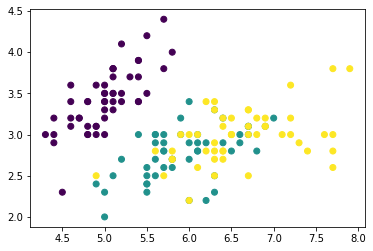

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = SGDClassifier()
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
print("kNN score: {:.2f}".format(knn.score(X_test, y_test)))
clf.fit(X_train, y_train)
print("Linear Reg score: {:.2f}".format(clf.score(X_test, y_test)))

kNN score: 1.00
Linear Reg score: 0.89


In [11]:
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    print("K가", i, "일때 정확도: {:.2f}".format(knn.score(X_test, y_test)))

K가 1 일때 정확도: 1.00
K가 2 일때 정확도: 0.98
K가 3 일때 정확도: 1.00
K가 4 일때 정확도: 1.00
K가 5 일때 정확도: 1.00
K가 6 일때 정확도: 1.00
K가 7 일때 정확도: 1.00
K가 8 일때 정확도: 1.00
K가 9 일때 정확도: 1.00


## 교차 검증 (K-Fold Cross Validation)

In [13]:
from sklearn.model_selection import cross_val_score, KFold
cross_val_score(knn, X, y, cv=5).mean()

0.9733333333333334

In [14]:
cross_val_score(clf, X, y, cv=5).mean().round(4)

0.8333

## 분석
- 선형 알고리즘이 성능이 더 좋지 않은 것으로 나타난다. (하지만 데이터 사이즈가 작아 불확실)
- scaling 한 후에 다시 한 번 확인해 보자 
- 선형 모델이나 SVM, 신경망에서는 반드시 scaling 을 해야 한다.

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
cross_val_score(clf, X_sc, y, cv=5).mean().round(4)

0.9467

In [18]:
cross_val_score(knn, X_sc, y, cv=5).mean().round(4)  # 별 차이가 없음

0.96

In [ ]:
knn

KNeighborsClassifier(n_neighbors=9)